In [1]:
# macro do ipython para rederizar o matplotlib inline
%matplotlib inline

# numpy é uma biblioteca de python que 
# nos permite fazer operações matriciais e vetoriais
# facilmente, e eficientemente (até um certo tamanho)
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("white")

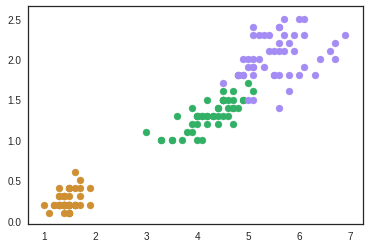

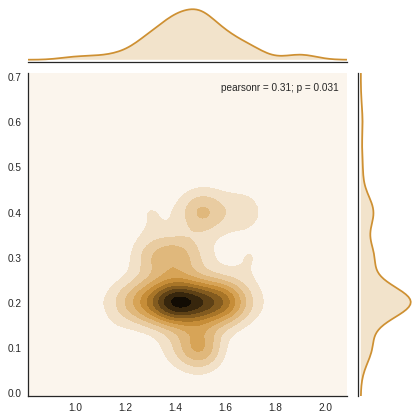

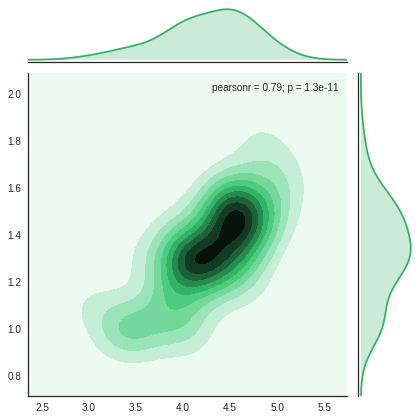

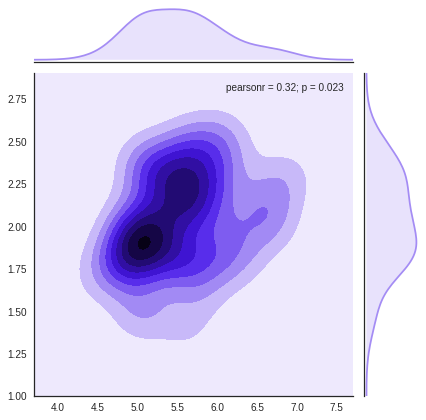

In [2]:
from sklearn.datasets import load_iris
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4
iris = load_iris()
X, y = iris.data[:,-2:], iris.target
nome_atributos = iris.feature_names[-2:]

current_palette = sns.color_palette("husl", 8)

colors = [current_palette[1], current_palette[3], current_palette[6], current_palette[5]]
# dados sem os cortes da árvore
for i, c in enumerate(np.unique(y)):
    mask = y == c
    plt.scatter(X[mask,0], X[mask, 1], c=colors[i])
    
plt.show()
for i, c in enumerate(np.unique(y)):
    mask = y == c
    sns.jointplot(X[mask,0], X[mask, 1], kind='kde', color=colors[i])
    plt.show()

Podemos notar que os atributos tem baixa correlação e, de certa forma, são distribuidos de forma normal. Portanto, nós vamos utilizar o Naïve Bayes Gaussiano. Para isso, vamos utilizar a implementação disponibilizada pelo scikit-learn.

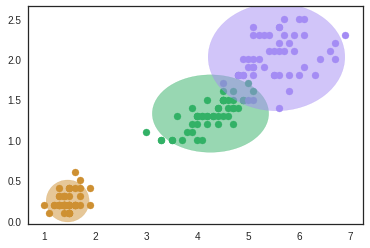

In [4]:
def make_ellipses(gnb, ax, color):
    """Adaptação do código encontrado em:
    http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html
    Para entender melhor como funciona olhar seguinte explicação:
    http://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/
    """
    means = gnb.theta_
    variances = gnb.sigma_
    for c in range(variances.shape[0]):
        # como as variáveis são independente
        # a matrix de covariância é uma matriz
        # diagonal, onde a diagonal são as 
        # variâncias dos atributos
        covariance = np.diag(variances[c,:])
        v, w = np.linalg.eigh(covariance)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(5.991) * np.sqrt(v)
        ell = mpl.patches.Ellipse(means[c], v[0], v[1],
                                  180 + angle, color=color[c])
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

nb = GaussianNB().fit(X, y)

# dados sem os cortes da árvore
for i, c in enumerate(np.unique(y)):
    mask = y == c
    plt.scatter(X[mask,0], X[mask, 1], c=colors[i])
ax = plt.gca()

make_ellipses(nb, ax, colors)

$\arg_y \max P(y)\prod_{i=1}^n P(x_i|y) = \arg_y \max \log(P(y)\prod_{i=1}^n P(x_i|y)) = \arg_y \max \log(P(y)) +  \sum_{i=1}^n \log(P(x_i|y))$

$\arg_{y} \max P(resfriado =\ y) \times P(calafrios = S\ |\ resfriado =\ y)  \times P(nariz\ escorrendo = N\ |\ resfriado =\ y)  \times  P(dor\ de\ cabeça = mediana\ |\ resfriado =\ y) \times P(febre = N\ |\ resfriado =\ y)\ \forall\ y \in \{S, N\}$ 

$P(resfriado =\ S) \times P(calafrios = S\ |\ resfriado =\ S)  \times P(nariz\ escorrendo = N\ |\ resfriado =\ S)  \times  P(dor\ de\ cabeça = mediana\ |\ resfriado =\ S) \times P(febre = N\ |\ resfriado =\ S) = 0.0060$ 

$P(resfriado =\ N) \times P(calafrios = S\ |\ resfriado =\ N)  \times P(nariz\ escorrendo = N\ |\ resfriado =\ N)  \times  P(dor\ de\ cabeça = mediana\ |\ resfriado =\ N) \times P(febre = N\ |\ resfriado =\ N) = 0.0185$ 